In [74]:
import os
import pandas as pd
import numpy as np
import pyiat
from scipy import stats
data=pd.read_excel('iat2_all.xlsx')
data['correct']=1-data['error']
data

,Unnamed: 0,subj_idx,stim4,stim3,stim1,block,condition,error,resp_num,rt,...,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT,initiation_time,idle_time,correct
0,id0001,134,NaN,ev1,ev1,1,ev1,0,2,4036,...,0.083861,0.124684,3,0,0,0,4008,919,2249,1
1,id0002,134,NaN,unreal,unreal,1,unreal,1,1,2053,...,0.066087,0.209994,1,0,1,0,2047,581,934,0
2,id0003,134,NaN,real,real,1,real,0,1,2559,...,0.443299,1.179845,1,1,1,0,2537,591,1234,1
3,id0004,134,NaN,ev1,ev1,1,ev1,0,2,2716,...,0.034791,0.099700,2,0,0,0,2702,477,1428,1
4,id0005,134,NaN,ev1,ev1,1,ev1,0,2,1973,...,0.107594,0.215797,2,1,0,1,1967,202,684,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,id5196,160,NaN,unreal,unreal,7,compatible,0,2,907,...,0.366819,0.770872,2,0,2,0,891,31,422,1
14036,id5197,160,NaN,unreal,unreal,7,compatible,1,1,1640,...,0.646665,0.659926,2,3,2,0,1625,0,424,0
14037,id5198,160,NaN,unreal,unreal,7,compatible,0,2,1062,...,0.525071,1.033698,1,0,1,0,1047,16,407,1
14038,id5199,160,NaN,real,real,7,compatible,0,1,1141,...,0.017075,0.116451,0,0,0,0,1109,0,483,1


# calculating the weighted d_scores

In [75]:
d=data[(data['block']==4)|(data['block']==7)]

In [76]:
print(stats.pearsonr(d['rt'], d['MAD']))
print(stats.pearsonr(d['rt'], d['AD']))
print(stats.pearsonr(d['rt'], d['AUC']))

(0.26959366779076427, 1.2224371459074716e-172)
(0.3245433574559774, 1.2055227187288006e-253)
(0.15190288381371692, 9.996025070964259e-55)


In [77]:
error=d.groupby(['subj_idx'])['error'].mean()
error=pd.DataFrame(error)
print(error.mean())
error=d.groupby(['subj_idx','condition'])['error'].mean()
error=pd.DataFrame(error)
print(error['error'][:,'compatible'].mean())
print(error['error'][:,'incompatible'].mean())

error    0.172404
dtype: float64
0.05942307692307692
0.2853846153846154


In [78]:
rtmean=d.groupby(['subj_idx','stim3','condition'])['rt'].mean()
rtstd=d.groupby(['subj_idx','stim3'])['rt'].std()
rtmean=pd.DataFrame(rtmean)
rtstd=pd.DataFrame(rtstd)


In [79]:
dscore_ev1=[]
for i in range(27):
    if i==18:
        continue
  
    dscore_ev1.append((rtmean['rt'][i+134,'ev1','compatible']-rtmean['rt'][i+134,'ev1','incompatible'])/rtstd['rt'][i+134,'ev1'])
print(np.mean(dscore_ev1))
print(np.std(dscore_ev1))

-0.4361263249393686
0.3002619396353549


In [80]:
dscore_ev2=[]
for i in range(27):
    if i==18:
        continue
    dscore_ev2.append((rtmean['rt'][i+134,'ev2','compatible']-rtmean['rt'][i+134,'ev2','incompatible'])/rtstd['rt'][i+134,'ev2'])
print(np.mean(dscore_ev2))
print(np.std(dscore_ev2))

-0.49843361038346007
0.37615016887600305


In [81]:
rtmean_overall=d.groupby(['subj_idx','condition'])['rt'].mean()
rtstd_overall=d.groupby(['subj_idx'])['rt'].std()
rtmean_overall=pd.DataFrame(rtmean_overall)
rtstd_overall=pd.DataFrame(rtstd_overall)

In [82]:
dscore=[]
for i in range(27):
    if i==18:
        continue
    dscore.append((rtmean_overall['rt'][i+134,'compatible']-rtmean_overall['rt'][i+134,'incompatible'])/rtstd_overall['rt'][i+134])
print(np.mean(dscore))
print(np.std(dscore))

-0.4232833372478498
0.24517690999157588


In [83]:
print(stats.ttest_rel(dscore_ev1,dscore_ev2))

Ttest_relResult(statistic=0.8988910627541924, pvalue=0.37728730482975004)


In [84]:
rtmean_modality=d.groupby(['subj_idx','stim4','condition'])['rt'].mean()
rtstd_modality=d.groupby(['subj_idx','stim4'])['rt'].std()
rtmean_modality=pd.DataFrame(rtmean_modality)
rtstd_modality=pd.DataFrame(rtstd_modality)


In [85]:
dscore_word=[]
for i in range(27):
    if i==18:
        continue
    dscore_word.append((rtmean_modality['rt'][i+134,'word','compatible']-rtmean_modality['rt'][i+134,'word','incompatible'])/rtstd_modality['rt'][i+134,'word'])
print(np.mean(dscore_word))
print(np.std(dscore_word))

-0.39851693623246365
0.3367836394835889


In [86]:
dscore_imag=[]
for i in range(27):
    if i==18:
        continue
    dscore_imag.append((rtmean_modality['rt'][i+134,'imag','compatible']-rtmean_modality['rt'][i+134,'imag','incompatible'])/rtstd_modality['rt'][i+134,'imag'])
print(np.mean(dscore_imag))
print(np.std(dscore_imag))

-0.5819975426716584
0.33012747069088


In [87]:
stats.ttest_rel(dscore_word,dscore_imag)

Ttest_relResult(statistic=3.0035184715256706, pvalue=0.0059873408465537115)

In [88]:
stats.ttest_rel(dscore_word,[0 for i in range(26)])

Ttest_relResult(statistic=-5.916512702985426, pvalue=3.562000204009454e-06)

In [89]:
stats.ttest_rel(dscore_imag,[0 for i in range(26)])

Ttest_relResult(statistic=-8.814739673945837, pvalue=3.8353184731098e-09)

# RT

In [90]:
data1=data[(data.block==4)|(data.block==7)]

data1=data1[data1['correct']==1]
data1=data1[data1['rt']<5000]

In [91]:
RT =pd.DataFrame(columns=('subj_idx','total_com','total_incom','ev1_com','ev1_incom','ev2_com','ev2_incom','ev1_imag_com','ev1_imag_incom','ev1_word_com','ev1_word_incom','ev2_imag_com','ev2_imag_com','ev2_word_com','ev2_word_com'))
RT.subj_idx=range(134,161)
for i in range(134,161):
    
    RT.iloc[i-134,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-134,3]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,4]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-134,5]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,6]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-134,7]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,8]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-134,9]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,10]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-134,11]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,12]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-134,13]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,14]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='incompatible')].RT.mean()

RT=RT[RT['subj_idx']!=152]
RT

,subj_idx,total_com,total_incom,ev1_com,ev1_incom,ev2_com,ev2_incom,ev1_imag_com,ev1_imag_incom,ev1_word_com,ev1_word_incom,ev2_imag_com,ev2_imag_com,ev2_word_com,ev2_word_com
0,134,1223.46,1302.94,1412.07,1619.88,1103.4,1273.47,1296.09,1615.15,1533.32,1625.45,1032.48,1256.67,1180.48,1289.5
1,135,1179.11,1269.73,1240.98,1246.32,1152.37,1389.81,1243.72,1229.7,1238.24,1257.4,1106.24,1311.29,1200.42,1546.86
2,136,1071.37,1522.24,1185.24,1806.33,1038.48,1636.32,1107.29,1975,1274.33,1637.67,890.28,1522.05,1214.9,1756.3
3,137,1568.9,2095.15,1580.69,2003.88,1426.02,2090.35,1481.12,1871.24,1676.28,2101.91,1229.48,1988.64,1622.56,2183.58
4,138,1809.36,2074.39,1834.77,2195.13,1705.26,2013.72,1575.25,2271.79,2250,2132,1704.59,1951.54,1705.95,2048.87
5,139,1015.59,1064.12,1010.04,1136.24,1091.88,NaN,906.4,NaN,1113.68,1136.24,1059.4,NaN,1124.36,NaN
6,140,1288.64,1691.76,1206.98,1675.6,1344.06,1723.49,1155.88,1758,1256.04,1593.2,1230.84,1762.82,1462,1672.59
7,141,1362.85,1570.49,1393.94,1742.81,1398.96,NaN,1388.6,1867.33,1399.28,1712.92,1254.96,NaN,1542.96,NaN
8,142,1189.94,1508.98,1117.96,1824.16,1177.1,1612.03,1006.32,1690.5,1239.3,2007.94,1079.44,1567.63,1274.76,1676.92
9,143,1037.53,1209.48,852.048,1181,1167.15,NaN,896.286,1140.62,763.571,1463.67,1056.33,NaN,1259.5,NaN


In [92]:
print(RT.total_com.mean())
print(RT.total_com.std())
print(RT.total_incom.mean())
print(RT.total_incom.std())

1222.8086883753904
276.20720272443543
1503.3621948537327
358.62919348190997


In [93]:
print(stats.ttest_rel(RT.total_com,RT.total_incom))


print(stats.ttest_rel(RT.loc[:,['ev1_com','ev1_incom']].dropna().ev1_com,RT.loc[:,['ev1_com','ev1_incom']].dropna().ev1_incom))
print(stats.ttest_rel(RT.loc[:,['ev2_com','ev2_incom']].dropna().ev2_com,RT.loc[:,['ev2_com','ev2_incom']].dropna().ev2_incom))
print(stats.ttest_rel(RT.loc[:,['ev1_com','ev2_com']].dropna().ev1_com,RT.loc[:,['ev1_com','ev2_com']].dropna().ev2_com))
print(stats.ttest_rel(RT.loc[:,['ev1_incom','ev2_incom']].dropna().ev1_incom,RT.loc[:,['ev1_incom','ev2_incom']].dropna().ev2_incom))

Ttest_relResult(statistic=-9.688750608459452, pvalue=6.046025340329566e-10)
Ttest_relResult(statistic=-8.382227135652474, pvalue=9.929743440423424e-09)
Ttest_relResult(statistic=-7.282227932793847, pvalue=4.825563654310527e-07)
Ttest_relResult(statistic=1.7933450450624038, pvalue=0.08502508779293447)
Ttest_relResult(statistic=-0.4579188784703647, pvalue=0.6519468729072515)


# AUC


In [94]:
AUC =pd.DataFrame(columns=('subj_idx','total_com','total_incom','ev1_com','ev1_incom','ev2_com','ev2_incom','ev1_imag_com','ev1_imag_incom','ev1_word_com','ev1_word_incom','ev2_imag_com','ev2_imag_com','ev2_word_com','ev2_word_com'))
AUC.subj_idx=range(134,161)
for i in range(134,161):
    
    AUC.iloc[i-134,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-134,3]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,4]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-134,5]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,6]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-134,7]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,8]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-134,9]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,10]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-134,11]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,12]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-134,13]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,14]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='incompatible')].AUC.mean()

AUC=AUC[AUC['subj_idx']!=152]
AUC

,subj_idx,total_com,total_incom,ev1_com,ev1_incom,ev2_com,ev2_incom,ev1_imag_com,ev1_imag_incom,ev1_word_com,ev1_word_incom,ev2_imag_com,ev2_imag_com,ev2_word_com,ev2_word_com
0,134,0.480302,0.420379,0.634518,0.523714,0.324697,0.270531,0.604657,0.786724,0.665737,0.212885,0.273249,0.276743,0.38062,0.264601
1,135,0.159562,0.140233,0.214548,0.107926,0.0876313,0.199444,0.168883,0.221839,0.260213,0.031983,0.021291,0.159003,0.156736,0.280324
2,136,0.392158,0.339978,0.454564,0.344568,0.381272,0.328494,0.495769,0.47989,0.407472,0.209245,0.308471,0.23917,0.467939,0.422284
3,137,0.220043,0.391104,0.283658,0.307167,0.0685667,0.340124,0.204987,0.500181,0.359182,0.164504,-0.00984784,0.338327,0.146981,0.341771
4,138,0.400048,0.385318,0.321901,0.390154,0.424792,0.33066,0.331345,0.406195,0.306791,0.376945,0.385082,0.328893,0.466394,0.331659
5,139,0.297228,0.393882,0.239242,0.507629,0.328731,NaN,0.218774,NaN,0.25971,0.507629,0.339315,NaN,0.318146,NaN
6,140,0.430899,0.417277,0.442502,0.565429,0.233141,0.144001,0.4497,0.861644,0.435592,0.269215,0.290291,0.112126,0.173611,0.185249
7,141,0.371432,0.250709,0.32766,0.319766,0.403005,NaN,0.293115,0.333653,0.362205,0.316433,0.324186,NaN,0.481825,NaN
8,142,0.346549,0.512317,0.286843,0.564338,0.365381,0.588468,0.297333,0.548909,0.27544,0.585554,0.199065,0.689408,0.531698,0.440941
9,143,0.102795,0.355284,0.0453616,0.0818921,0.0322653,NaN,0.0710013,0.0481714,-0.00591793,0.317937,-0.0110026,NaN,0.0683219,NaN


In [95]:
print(AUC.total_com.mean())
print(AUC.total_com.std())
print(AUC.total_incom.mean())
print(AUC.total_incom.std())

0.29549886306990136
0.1291389220769965
0.33661604254314076
0.10664758235174975


In [96]:
#配对t-test


print(stats.ttest_rel(AUC.total_com,AUC.total_incom))


print(stats.ttest_rel(AUC.loc[:,['ev1_com','ev1_incom']].dropna().ev1_com,AUC.loc[:,['ev1_com','ev1_incom']].dropna().ev1_incom))
print(stats.ttest_rel(AUC.loc[:,['ev2_com','ev2_incom']].dropna().ev2_com,AUC.loc[:,['ev2_com','ev2_incom']].dropna().ev2_incom))
print(stats.ttest_rel(AUC.loc[:,['ev1_com','ev2_com']].dropna().ev1_com,AUC.loc[:,['ev1_com','ev2_com']].dropna().ev2_com))
print(stats.ttest_rel(AUC.loc[:,['ev1_incom','ev2_incom']].dropna().ev1_incom,AUC.loc[:,['ev1_incom','ev2_incom']].dropna().ev2_incom))

Ttest_relResult(statistic=-2.2060888943834263, pvalue=0.03679009895749883)
Ttest_relResult(statistic=-1.765289427748222, pvalue=0.089728848494482)
Ttest_relResult(statistic=-1.7796620406164305, pvalue=0.09033245246997168)
Ttest_relResult(statistic=0.34575678258145875, pvalue=0.7324181979979169)
Ttest_relResult(statistic=0.9492404126564776, pvalue=0.3538286342028797)


# MAD

In [97]:
MAD =pd.DataFrame(columns=('subj_idx','total_com','total_incom','ev1_com','ev1_incom','ev2_com','ev2_incom','ev1_imag_com','ev1_imag_incom','ev1_word_com','ev1_word_incom','ev2_imag_com','ev2_imag_com','ev2_word_com','ev2_word_com'))
MAD.subj_idx=range(134,161)
for i in range(134,161):
    if i==152:
        continue
    MAD.iloc[i-134,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-134,3]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,4]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-134,5]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,6]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-134,7]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,8]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-134,9]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,10]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-134,11]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,12]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-134,13]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,14]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='incompatible')].MAD.mean()

MAD=MAD[MAD['subj_idx']!=152]
MAD


,subj_idx,total_com,total_incom,ev1_com,ev1_incom,ev2_com,ev2_incom,ev1_imag_com,ev1_imag_incom,ev1_word_com,ev1_word_incom,ev2_imag_com,ev2_imag_com,ev2_word_com,ev2_word_com
0,134,0.721341,0.669546,0.93106,0.780246,0.508363,0.512366,0.877798,1.08695,0.986743,0.417782,0.415026,0.515005,0.609817,0.509846
1,135,0.194005,0.222114,0.247808,0.195903,0.128613,0.454992,0.177391,0.294783,0.318225,0.129984,0.023078,0.242231,0.238545,0.880513
2,136,0.630787,0.566702,0.828478,0.645577,0.482232,0.570598,0.892474,0.87727,0.755339,0.413884,0.313183,0.331096,0.683481,0.822076
3,137,0.358956,0.672099,0.40376,0.512024,0.149829,0.585625,0.255568,0.773565,0.546025,0.318712,0.00559333,0.538248,0.294065,0.629054
4,138,0.725896,0.761176,0.475007,0.739534,0.794843,0.67415,0.500121,0.782954,0.434825,0.703776,0.700942,0.639818,0.893216,0.693554
5,139,0.464533,0.63305,0.372819,0.788962,0.550728,NaN,0.294015,NaN,0.451623,0.788962,0.533937,NaN,0.567519,NaN
6,140,0.741796,0.767557,0.72099,0.844319,0.469989,0.408037,0.772458,1.23473,0.671582,0.453909,0.466315,0.344352,0.473815,0.490452
7,141,0.63606,0.352756,0.606184,0.443649,0.670621,NaN,0.430015,0.604222,0.782352,0.405111,0.530853,NaN,0.810388,NaN
8,142,0.562268,0.845886,0.441395,1.00964,0.616651,1.09163,0.374114,0.997408,0.514527,1.02645,0.337858,1.15217,0.895445,1.00315
9,143,0.167938,0.57845,0.0612154,0.170835,0.0685861,NaN,0.113009,0.138462,-0.0423711,0.397448,-0.00198393,NaN,0.127395,NaN


In [98]:
mad_mean=MAD.mean()
mad_mean

subj_idx          146.807692
total_com           0.462013
total_incom         0.558242
ev1_com             0.459470
ev1_incom           0.557935
ev2_com             0.402281
ev2_incom           0.636810
ev1_imag_com        0.416491
ev1_imag_incom      0.649544
ev1_word_com        0.501550
ev1_word_incom      0.490025
ev2_imag_com        0.332271
ev2_imag_com        0.569984
ev2_word_com        0.475287
ev2_word_com        0.681401
dtype: float64

In [99]:
mad_std=MAD.std()
mad_std

subj_idx          8.030040
total_com         0.224978
total_incom       0.195459
ev1_com           0.274970
ev1_incom         0.244526
ev2_com           0.256797
ev2_incom         0.341824
ev1_imag_com      0.291940
ev1_imag_incom    0.327828
ev1_word_com      0.291436
ev1_word_incom    0.260712
ev2_imag_com      0.256852
ev2_imag_com      0.348883
ev2_word_com      0.278929
ev2_word_com      0.361772
dtype: float64

In [100]:
print(stats.ttest_rel(MAD.total_com,MAD.total_incom))

Ttest_relResult(statistic=-2.8592565778545596, pvalue=0.008445012922043155)


In [101]:
#配对t-test


print(stats.ttest_rel(MAD.loc[:,['ev1_com','ev1_incom']].dropna().ev1_com,MAD.loc[:,['ev1_com','ev1_incom']].dropna().ev1_incom))
print(stats.ttest_rel(MAD.loc[:,['ev2_com','ev2_incom']].dropna().ev2_com,MAD.loc[:,['ev2_com','ev2_incom']].dropna().ev2_incom))
print(stats.ttest_rel(MAD.loc[:,['ev1_com','ev2_com']].dropna().ev1_com,MAD.loc[:,['ev1_com','ev2_com']].dropna().ev2_com))
print(stats.ttest_rel(MAD.loc[:,['ev1_incom','ev2_incom']].dropna().ev1_incom,MAD.loc[:,['ev1_incom','ev2_incom']].dropna().ev2_incom))

Ttest_relResult(statistic=-1.806570743744732, pvalue=0.08288203554340602)
Ttest_relResult(statistic=-3.4894108777888952, pvalue=0.0023110829652763904)
Ttest_relResult(statistic=1.3137375787578693, pvalue=0.20086336822375386)
Ttest_relResult(statistic=-0.5766813658575322, pvalue=0.570589020626191)


# AD

In [102]:
AD =pd.DataFrame(columns=('subj_idx','total_com','total_incom','ev1_com','ev1_incom','ev2_com','ev2_incom','ev1_imag_com','ev1_imag_incom','ev1_word_com','ev1_word_incom','ev2_imag_com','ev2_imag_com','ev2_word_com','ev2_word_com'))
AD.subj_idx=range(134,161)
for i in range(134,161):
   
    AD.iloc[i-134,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-134,3]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,4]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-134,5]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,6]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-134,7]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,8]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='imag')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-134,9]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,10]=data1[(data1.subj_idx==i)&(data1.stim3=='ev1')&(data1.stim4=='word')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-134,11]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,12]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='imag')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-134,13]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,14]=data1[(data1.subj_idx==i)&(data1.stim3=='ev2')&(data1.stim4=='word')&(data1.condition=='incompatible')].AD.mean()

AD=AD[AD['subj_idx']!=152]
AD

,subj_idx,total_com,total_incom,ev1_com,ev1_incom,ev2_com,ev2_incom,ev1_imag_com,ev1_imag_incom,ev1_word_com,ev1_word_incom,ev2_imag_com,ev2_imag_com,ev2_word_com,ev2_word_com
0,134,0.216009,0.191377,0.297239,0.244944,0.130276,0.138279,0.22541,0.382682,0.372332,0.0821618,0.103798,0.131883,0.159057,0.144385
1,135,0.0378348,0.0444811,0.0518669,0.0371805,0.0245451,0.11462,0.0342484,0.0614943,0.0694853,0.0209713,0.00295789,0.0570069,0.0470318,0.229847
2,136,0.182103,0.195209,0.267808,0.201063,0.124115,0.220512,0.277484,0.255585,0.25675,0.146541,0.0584073,0.122332,0.202338,0.3236
3,137,0.100622,0.207077,0.108805,0.150561,0.0571295,0.179081,0.0753835,0.234727,0.140889,0.0883525,0.0299222,0.183687,0.0843368,0.174859
4,138,0.224517,0.243981,0.112326,0.231326,0.24802,0.167771,0.111763,0.251054,0.113227,0.215079,0.214038,0.138599,0.283621,0.184259
5,139,0.189852,0.224239,0.16372,0.279628,0.207426,NaN,0.126306,NaN,0.201134,0.279628,0.218616,NaN,0.196237,NaN
6,140,0.188875,0.22927,0.161931,0.255205,0.122926,0.119305,0.155006,0.381218,0.168579,0.129192,0.105407,0.0973308,0.141174,0.147742
7,141,0.181737,0.103908,0.175167,0.142265,0.170034,NaN,0.112263,0.181761,0.23807,0.132786,0.127384,NaN,0.212684,NaN
8,142,0.139173,0.249404,0.0969497,0.331339,0.160198,0.301931,0.0670445,0.299777,0.129455,0.374736,0.0525581,0.309307,0.267837,0.29115
9,143,0.0624696,0.189554,0.0297559,0.037108,0.0278853,NaN,0.0455928,0.0229177,-0.00191795,0.13644,-0.00303801,NaN,0.0536547,NaN


In [103]:
AD.shape

(26, 15)

In [104]:
AD.mean()

subj_idx          146.807692
total_com           0.133641
total_incom         0.163190
ev1_com             0.131690
ev1_incom           0.161416
ev2_com             0.112876
ev2_incom           0.194290
ev1_imag_com        0.107544
ev1_imag_incom      0.183401
ev1_word_com        0.156153
ev1_word_incom      0.144530
ev2_imag_com        0.092616
ev2_imag_com        0.160896
ev2_word_com        0.133852
ev2_word_com        0.216228
dtype: float64

In [105]:
AD.std()

subj_idx          8.030040
total_com         0.067646
total_incom       0.061267
ev1_com           0.084116
ev1_incom         0.080100
ev2_com           0.076584
ev2_incom         0.133161
ev1_imag_com      0.078685
ev1_imag_incom    0.111720
ev1_word_com      0.100665
ev1_word_incom    0.086230
ev2_imag_com      0.077591
ev2_imag_com      0.123439
ev2_word_com      0.084432
ev2_word_com      0.150075
dtype: float64

In [106]:
print(stats.ttest_rel(AD.total_com,AD.total_incom))
print(stats.ttest_rel(AD.loc[:,['ev1_com','ev1_incom']].dropna().ev1_com,AD.loc[:,['ev1_com','ev1_incom']].dropna().ev1_incom))
print(stats.ttest_rel(AD.loc[:,['ev2_com','ev2_incom']].dropna().ev2_com,AD.loc[:,['ev2_com','ev2_incom']].dropna().ev2_incom))
print(stats.ttest_rel(AD.loc[:,['ev1_com','ev2_com']].dropna().ev1_com,AD.loc[:,['ev1_com','ev2_com']].dropna().ev2_com))
print(stats.ttest_rel(AD.loc[:,['ev1_incom','ev2_incom']].dropna().ev1_incom,AD.loc[:,['ev1_incom','ev2_incom']].dropna().ev2_incom))


Ttest_relResult(statistic=-2.931693415617378, pvalue=0.007110684016998772)
Ttest_relResult(statistic=-1.7512984830318017, pvalue=0.09215645638194463)
Ttest_relResult(statistic=-3.1210555346251545, pvalue=0.005381504537168308)
Ttest_relResult(statistic=1.3059898109585169, pvalue=0.2034457562897548)
Ttest_relResult(statistic=-0.8555093634295908, pvalue=0.40240234037700473)


# linear mixed effect models

In [107]:
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data1

,Unnamed: 0,subj_idx,stim4,stim3,stim1,block,condition,error,resp_num,rt,...,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT,initiation_time,idle_time,correct
2080,id0001,134,word,ev1,ev1_word,4,incompatible,0,2,1693,...,0.008062,0.037745,0,0,0,0,1679,509,883,1
2081,id0002,134,word,ev1,ev1_word,4,incompatible,0,2,1598,...,0.062785,0.206799,2,0,0,0,1573,309,1010,1
2083,id0004,134,NaN,unreal,unreal,4,incompatible,0,2,919,...,0.013656,0.062228,0,0,0,0,888,283,517,1
2084,id0005,134,NaN,unreal,unreal,4,incompatible,0,2,1110,...,0.028241,0.070464,0,0,0,0,1104,235,579,1
2085,id0006,134,NaN,unreal,unreal,4,incompatible,0,2,1054,...,0.028070,0.066094,0,0,0,0,1026,153,424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14034,id5195,160,NaN,real,real,7,compatible,0,1,984,...,0.198903,0.509905,5,0,3,0,968,0,203,1
14035,id5196,160,NaN,unreal,unreal,7,compatible,0,2,907,...,0.366819,0.770872,2,0,2,0,891,31,422,1
14037,id5198,160,NaN,unreal,unreal,7,compatible,0,2,1062,...,0.525071,1.033698,1,0,1,0,1047,16,407,1
14038,id5199,160,NaN,real,real,7,compatible,0,1,1141,...,0.017075,0.116451,0,0,0,0,1109,0,483,1


In [108]:
import pingouin
pingouin.anova(data=data1, dv='rt', between=['stim3','condition'], ss_type=2, detailed=False, effsize='np2')

,Source,SS,DF,MS,F,p-unc,np2
0,stim3,1.022775e+07,3.0,3.409248e+06,8.930083,6.643295e-06,0.003140
1,condition,1.456070e+08,1.0,1.456070e+08,381.398662,4.012759e-83,0.042924
2,stim3 * condition,3.979779e+06,3.0,1.326593e+06,3.474838,1.532237e-02,0.001224
3,Residual,3.246582e+09,8504.0,3.817712e+05,NaN,NaN,NaN


In [109]:
formula = 'RT~C(stim3)*C(condition)'

anova_inter = sm.stats.anova_lm(smf.ols('RT~C(stim3)*C(condition)', data = data1).fit())  # dc_sales_est 是一个模型对象
print(anova_inter)

                           df        sum_sq       mean_sq           F  \
C(stim3)                  3.0  1.088091e+07  3.626970e+06    9.504892   
C(condition)              1.0  1.456605e+08  1.456605e+08  381.719968   
C(stim3):C(condition)     3.0  3.972026e+06  1.324009e+06    3.469717   
Residual               8504.0  3.245040e+09  3.815898e+05         NaN   

                             PR(>F)  
C(stim3)               2.895722e-06  
C(condition)           3.439493e-83  
C(stim3):C(condition)  1.543074e-02  
Residual                        NaN  


In [110]:
pingouin.anova(data=data1, dv='rt', between=['condition','stim3','stim4'], ss_type=2, detailed=False, effsize='np2')

,Source,SS,DF,MS,F,p-unc,np2
0,condition,7.209227e+07,1.0,7.209227e+07,187.306022,1.314912e-41,0.049209
1,stim3,5.272572e+06,1.0,5.272572e+06,13.698896,2.177750e-04,0.003771
2,stim4,2.163526e+07,1.0,2.163526e+07,56.211500,8.139385e-14,0.015295
3,condition * stim3,8.834091e+04,1.0,8.834091e+04,0.229522,6.319072e-01,0.000063
4,condition * stim4,8.715333e+05,1.0,8.715333e+05,2.264368,1.324674e-01,0.000625
5,stim3 * stim4,1.157291e+05,1.0,1.157291e+05,0.300681,5.834898e-01,0.000083
6,condition * stim3 * stim4,1.712526e+05,1.0,1.712526e+05,0.444939,5.047908e-01,0.000123
7,Residual,1.392918e+09,3619.0,3.848903e+05,NaN,NaN,NaN


In [111]:
#anova:RT~2(congruency)*2(ev1/ev2)*2(word/imag)####！
formula1 = 'rt~C(condition)*C(stim3)*C(stim4)'

anova1 = sm.stats.anova_lm(smf.ols(formula1,data = data1).fit())  
anova1

,df,sum_sq,mean_sq,F,PR(>F)
C(condition),1.0,8.419168e+07,8.419168e+07,218.742026,4.203840e-48
C(stim3),3.0,6.528976e+06,2.176325e+06,5.654404,7.319734e-04
C(stim4),1.0,2.184562e+07,2.184562e+07,56.758047,6.190616e-14
C(condition):C(stim3),3.0,1.202749e+05,4.009165e+04,0.104164,9.576566e-01
C(condition):C(stim4),1.0,8.343156e+05,8.343156e+05,2.167671,1.410265e-01
C(stim3):C(stim4),3.0,2.929457e+05,9.764855e+04,0.253705,8.587375e-01
C(condition):C(stim3):C(stim4),3.0,2.063580e+05,6.878599e+04,0.178716,9.108735e-01
Residual,3619.0,1.392918e+09,3.848903e+05,NaN,NaN


In [112]:
len(data1.xpos_reversals)

8512

# visualization

In [113]:
data2=data1[(data1['stim1'] != 'real')&(data1['stim1']!='unreal')]
data2.iloc[:,16:26]
len(data2)

3627

In [114]:
data2

,Unnamed: 0,subj_idx,stim4,stim3,stim1,block,condition,error,resp_num,rt,...,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT,initiation_time,idle_time,correct
2080,id0001,134,word,ev1,ev1_word,4,incompatible,0,2,1693,...,0.008062,0.037745,0,0,0,0,1679,509,883,1
2081,id0002,134,word,ev1,ev1_word,4,incompatible,0,2,1598,...,0.062785,0.206799,2,0,0,0,1573,309,1010,1
2087,id0008,134,word,ev1,ev1_word,4,incompatible,0,2,1782,...,0.011347,0.049415,0,0,0,0,1779,268,1362,1
2100,id0021,134,word,ev1,ev1_word,4,incompatible,0,2,1302,...,0.062863,0.173080,2,1,0,1,1278,292,555,1
2110,id0031,134,imag,ev2,ev2_imag,4,incompatible,0,2,989,...,0.005412,0.034462,0,0,0,0,969,311,529,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14030,id5191,160,imag,ev2,ev2_imag,7,compatible,0,2,938,...,0.015820,0.064358,2,0,0,0,922,250,360,1
14031,id5192,160,imag,ev2,ev2_imag,7,compatible,0,2,953,...,0.273153,0.907282,2,1,2,0,938,250,407,1
14032,id5193,160,word,ev1,ev1_word,7,compatible,0,1,1047,...,0.166094,0.799222,3,2,3,0,1032,344,658,1
14033,id5194,160,word,ev1,ev1_word,7,compatible,0,1,1219,...,-0.018169,0.035091,2,0,0,0,1203,94,375,1


/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



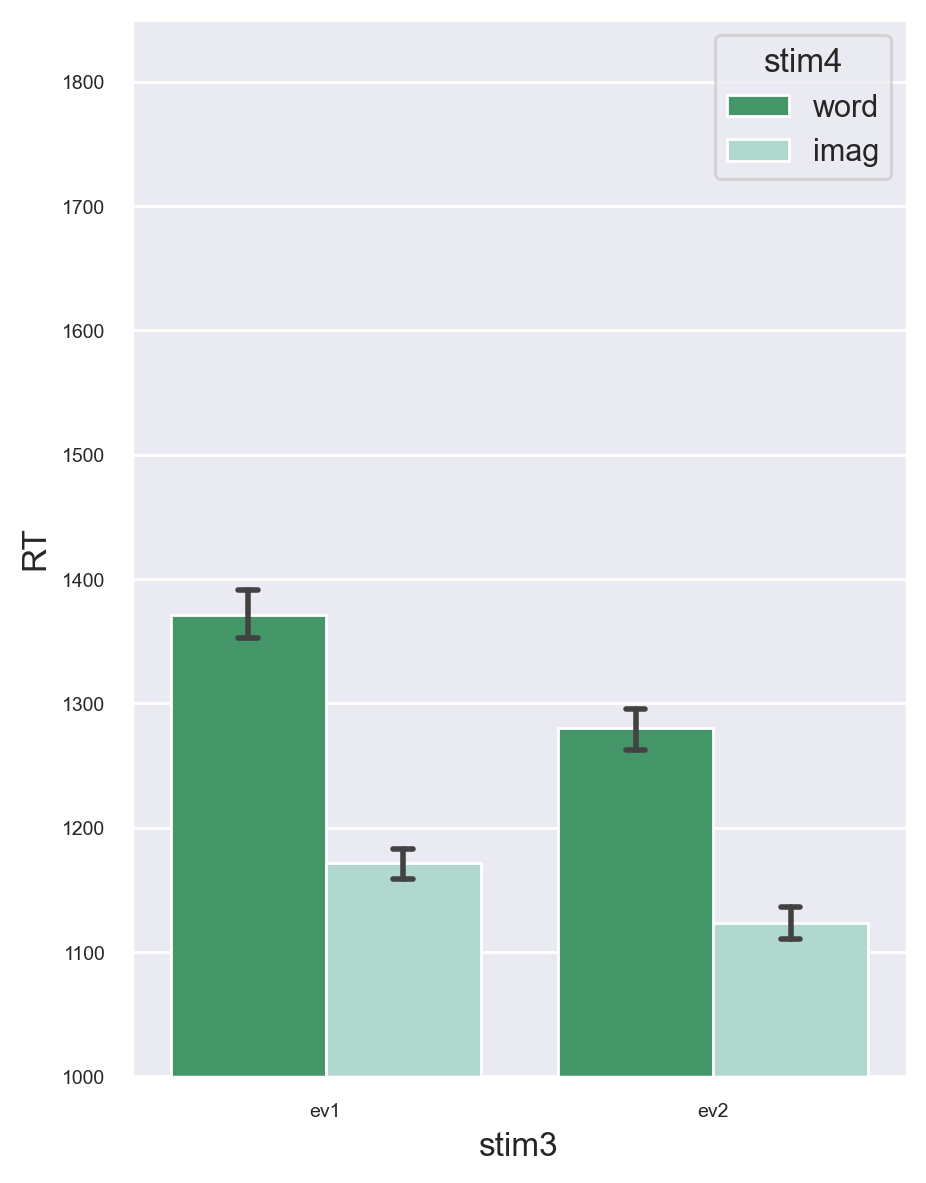

In [115]:
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,7),dpi=200);


data_com=data2[data2['condition']=='compatible']
a1=sns.barplot(x='stim3',y='RT',hue='stim4',data=data_com,capsize=0.05,errwidth=2,ci=50,palette='BuGn_r');


a1.tick_params(labelsize=7)
plt.ylim([1000,2000])
plt.yticks([1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])

plt.ylim([1000,1850])



plt.show()
plt.savefig('fig2b_com.png')


/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



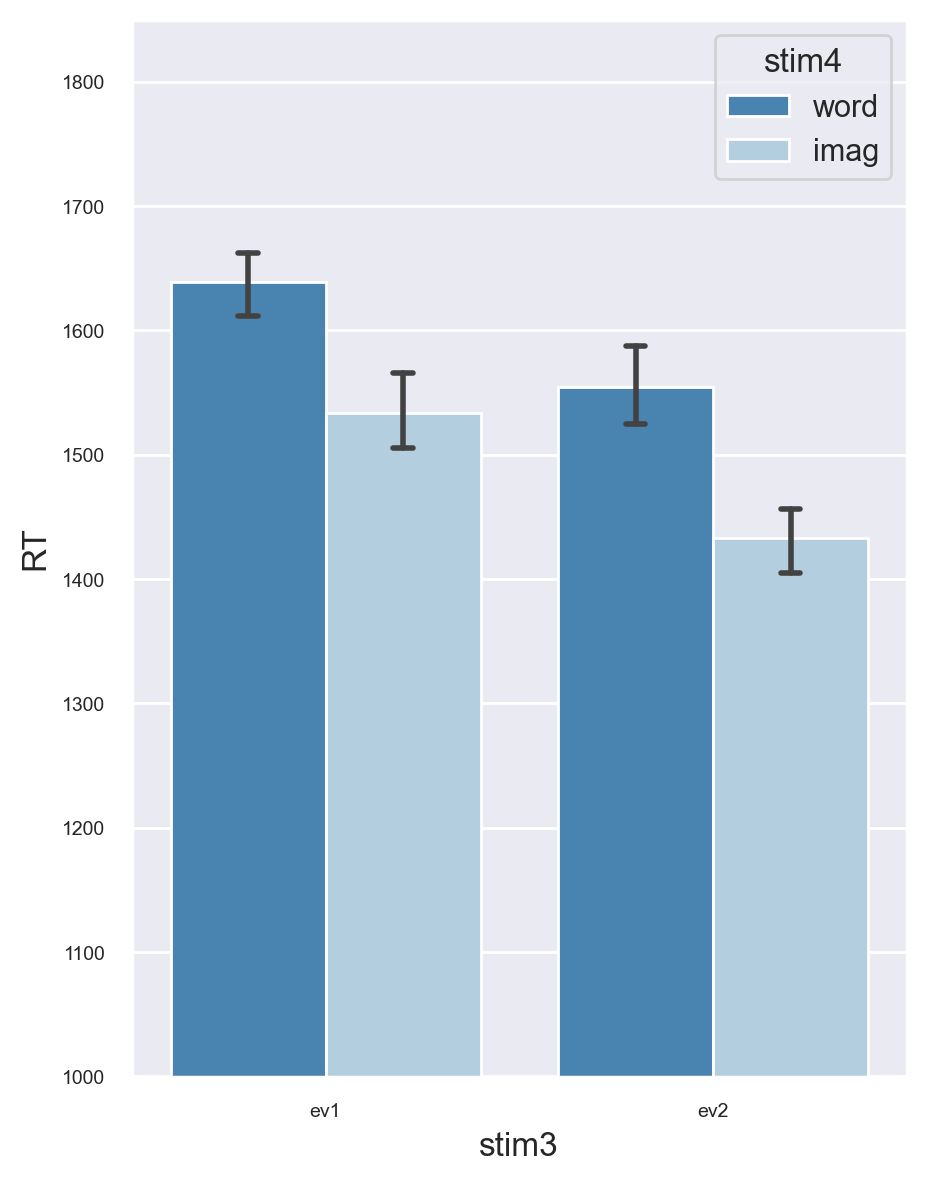

In [116]:
plt.figure(figsize=(5,7),dpi=200);


data_incom=data2[data2['condition']=='incompatible']
a1=sns.barplot(x='stim3',y='RT',hue='stim4',data=data_incom,capsize=0.05,errwidth=2,ci=50,palette='Blues_r');


a1.tick_params(labelsize=7)
plt.ylim([1000,2000])
plt.yticks([1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])

plt.ylim([1000,1850])



plt.show()
plt.savefig('fig2b_incom.png')

# pic-word analysis

In [117]:
RT =pd.DataFrame(columns=('subj_idx','total_com','total_incom','imag_com','imag_incom','word_com','word_incom'))
RT.subj_idx=range(134,161)
for i in range(134,161):
    
    RT.iloc[i-134,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-134,3]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,4]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='incompatible')].RT.mean()
    RT.iloc[i-134,5]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='compatible')].RT.mean()
    RT.iloc[i-134,6]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='incompatible')].RT.mean()
    

RT=RT[RT['subj_idx']!=152]
RT

,subj_idx,total_com,total_incom,imag_com,imag_incom,word_com,word_incom
0,134,1223.46,1302.94,1158.79,1393.74,1352.98,1401.48
1,135,1179.11,1269.73,1174.98,1277.29,1219.71,1349.5
2,136,1071.37,1522.24,996.571,1710.78,1244.62,1705.46
3,137,1568.9,2095.15,1352.73,1917.36,1649.42,2129.91
4,138,1809.36,2074.39,1637.11,2117.59,1932.64,2084.2
5,139,1015.59,1064.12,982.9,NaN,1119.02,1136.24
6,140,1288.64,1691.76,1194.12,1761.31,1356.92,1643.19
7,141,1362.85,1570.49,1321.78,1867.33,1471.12,1712.92
8,142,1189.94,1508.98,1042.88,1633.56,1257.77,1859.55
9,143,1037.53,1209.48,979.069,1140.62,1120.64,1463.67


In [118]:
print(stats.ttest_rel(RT.total_com,RT.total_incom))


print(stats.ttest_rel(RT.loc[:,['imag_com','imag_incom']].dropna().imag_com,RT.loc[:,['imag_com','imag_incom']].dropna().imag_incom))
print(stats.ttest_rel(RT.loc[:,['word_com','word_incom']].dropna().word_com,RT.loc[:,['word_com','word_incom']].dropna().word_incom))


Ttest_relResult(statistic=-9.688750608459452, pvalue=6.046025340329566e-10)
Ttest_relResult(statistic=-5.3166518160504825, pvalue=2.4557756739822632e-05)
Ttest_relResult(statistic=-8.468021923225958, pvalue=8.205969752328967e-09)


In [119]:
MAD =pd.DataFrame(columns=('subj_idx','total_com','total_incom','imag_com','imag_incom','word_com','word_incom'))
MAD.subj_idx=range(134,161)
for i in range(134,161):
    
    MAD.iloc[i-134,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-134,3]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,4]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='incompatible')].MAD.mean()
    MAD.iloc[i-134,5]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='compatible')].MAD.mean()
    MAD.iloc[i-134,6]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='incompatible')].MAD.mean()
    

MAD=MAD[MAD['subj_idx']!=152]
MAD

,subj_idx,total_com,total_incom,imag_com,imag_incom,word_com,word_incom
0,134,0.721341,0.669546,0.636771,0.733689,0.794092,0.479158
1,135,0.194005,0.222114,0.100234,0.264128,0.279198,0.368789
2,136,0.630787,0.566702,0.596918,0.558668,0.71941,0.647136
3,137,0.358956,0.672099,0.12803,0.681119,0.420045,0.425115
4,138,0.725896,0.761176,0.596166,0.714037,0.70222,0.697898
5,139,0.464533,0.63305,0.413976,NaN,0.509571,0.788962
6,140,0.741796,0.767557,0.616263,0.622595,0.574716,0.476918
7,141,0.63606,0.352756,0.480434,0.604222,0.79637,0.405111
8,142,0.562268,0.845886,0.355986,1.06913,0.712922,1.016
9,143,0.167938,0.57845,0.0535297,0.138462,0.0798602,0.397448


In [120]:
print(stats.ttest_rel(MAD.total_com,MAD.total_incom))


print(stats.ttest_rel(MAD.loc[:,['imag_com','imag_incom']].dropna().imag_com,MAD.loc[:,['imag_com','imag_incom']].dropna().imag_incom))
print(stats.ttest_rel(MAD.loc[:,['word_com','word_incom']].dropna().word_com,MAD.loc[:,['word_com','word_incom']].dropna().word_incom))


Ttest_relResult(statistic=-2.8592565778545596, pvalue=0.008445012922043155)
Ttest_relResult(statistic=-3.457160645221294, pvalue=0.0022429433455622046)
Ttest_relResult(statistic=-0.6485848584032459, pvalue=0.522520321122053)


In [121]:
AD =pd.DataFrame(columns=('subj_idx','total_com','total_incom','imag_com','imag_incom','word_com','word_incom'))
AD.subj_idx=range(134,161)
for i in range(134,161):
    
    AD.iloc[i-134,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-134,3]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,4]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='incompatible')].AD.mean()
    AD.iloc[i-134,5]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='compatible')].AD.mean()
    AD.iloc[i-134,6]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='incompatible')].AD.mean()
    

AD=AD[AD['subj_idx']!=152]
AD

,subj_idx,total_com,total_incom,imag_com,imag_incom,word_com,word_incom
0,134,0.216009,0.191377,0.16207,0.227777,0.263325,0.123644
1,135,0.0378348,0.0444811,0.0186032,0.0588767,0.0584877,0.0874316
2,136,0.182103,0.195209,0.16571,0.177854,0.229544,0.247717
3,137,0.100622,0.207077,0.052189,0.214675,0.112613,0.118012
4,138,0.224517,0.243981,0.160677,0.196909,0.212623,0.197358
5,139,0.189852,0.224239,0.172461,NaN,0.198686,0.279628
6,140,0.188875,0.22927,0.129701,0.186046,0.155157,0.140871
7,141,0.181737,0.103908,0.119823,0.181761,0.225377,0.132786
8,142,0.139173,0.249404,0.0598013,0.304193,0.201529,0.337266
9,143,0.0624696,0.189554,0.0204389,0.0229177,0.0380943,0.13644


In [122]:
print(stats.ttest_rel(AD.total_com,AD.total_incom))


print(stats.ttest_rel(AD.loc[:,['imag_com','imag_incom']].dropna().imag_com,AD.loc[:,['imag_com','imag_incom']].dropna().imag_incom))
print(stats.ttest_rel(AD.loc[:,['word_com','word_incom']].dropna().word_com,AD.loc[:,['word_com','word_incom']].dropna().word_incom))


Ttest_relResult(statistic=-2.931693415617378, pvalue=0.007110684016998772)
Ttest_relResult(statistic=-3.296600016276019, pvalue=0.0032884866848809213)
Ttest_relResult(statistic=-0.8876403810383336, pvalue=0.3831946877665202)


In [123]:
AUC =pd.DataFrame(columns=('subj_idx','total_com','total_incom','imag_com','imag_incom','word_com','word_incom'))
AUC.subj_idx=range(134,161)
for i in range(134,161):
    
    AUC.iloc[i-134,1]=data1[(data1.subj_idx==i)&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,2]=data1[(data1.subj_idx==i)&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-134,3]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,4]=data1[(data1.subj_idx==i)&(data1.stim4=='imag')&(data1.condition=='incompatible')].AUC.mean()
    AUC.iloc[i-134,5]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='compatible')].AUC.mean()
    AUC.iloc[i-134,6]=data1[(data1.subj_idx==i)&(data1.stim4=='word')&(data1.condition=='incompatible')].AUC.mean()
    

AUC=AUC[AUC['subj_idx']!=152]
AUC

,subj_idx,total_com,total_incom,imag_com,imag_incom,word_com,word_incom
0,134,0.480302,0.420379,0.432049,0.471735,0.52001,0.247362
1,135,0.159562,0.140233,0.0950871,0.185185,0.20953,0.111001
2,136,0.392158,0.339978,0.400209,0.33947,0.437706,0.330982
3,137,0.220043,0.391104,0.0953776,0.436595,0.253082,0.225282
4,138,0.400048,0.385318,0.357045,0.368975,0.399892,0.350906
5,139,0.297228,0.393882,0.279045,NaN,0.288928,0.507629
6,140,0.430899,0.417277,0.368369,0.346351,0.307275,0.216348
7,141,0.371432,0.250709,0.30865,0.333653,0.422015,0.316433
8,142,0.346549,0.512317,0.248199,0.614018,0.408908,0.520727
9,143,0.102795,0.355284,0.0285855,0.0481714,0.0475347,0.317937


In [124]:
print(stats.ttest_rel(AUC.total_com,AUC.total_incom))


print(stats.ttest_rel(AUC.loc[:,['imag_com','imag_incom']].dropna().imag_com,AUC.loc[:,['imag_com','imag_incom']].dropna().imag_incom))
print(stats.ttest_rel(AUC.loc[:,['word_com','word_incom']].dropna().word_com,AUC.loc[:,['word_com','word_incom']].dropna().word_incom))

Ttest_relResult(statistic=-2.2060888943834263, pvalue=0.03679009895749883)
Ttest_relResult(statistic=-2.6352721766855347, pvalue=0.015114243591018822)
Ttest_relResult(statistic=0.053506885522631095, pvalue=0.957753330580212)


In [125]:
data=pd.read_excel('iat1_all.xlsx')
data['correct']=1-data['error']
data=data[data['subj_idx']!=106]
d=data[(data['block']==4)|(data['block']==7)]
rtmean_overall=d.groupby(['subj_idx','condition'])['rt'].mean()
rtstd_overall=d.groupby(['subj_idx'])['rt'].std()
rtmean_overall=pd.DataFrame(rtmean_overall)
rtstd_overall=pd.DataFrame(rtstd_overall)
dscore1=[]
for i in range(33):
    if i==5:
        continue
    dscore1.append((rtmean_overall['rt'][i+101,'compatible']-rtmean_overall['rt'][i+101,'incompatible'])/rtstd_overall['rt'][i+101])
print(np.mean(dscore1))
print(np.std(dscore1))

FileNotFoundError: [Errno 2] No such file or directory: 'iat1_all.xlsx'

In [ ]:
print(stats.ttest_ind(dscore1,dscore))

Ttest_indResult(statistic=2.983510989467976, pvalue=0.004215893194825499)


# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.tools as tls
import plotly.figure_factory as ff
sns.set(style="whitegrid")

In [ ]:
dataeda1=data1[['rt','MAD','AD','AUC']]

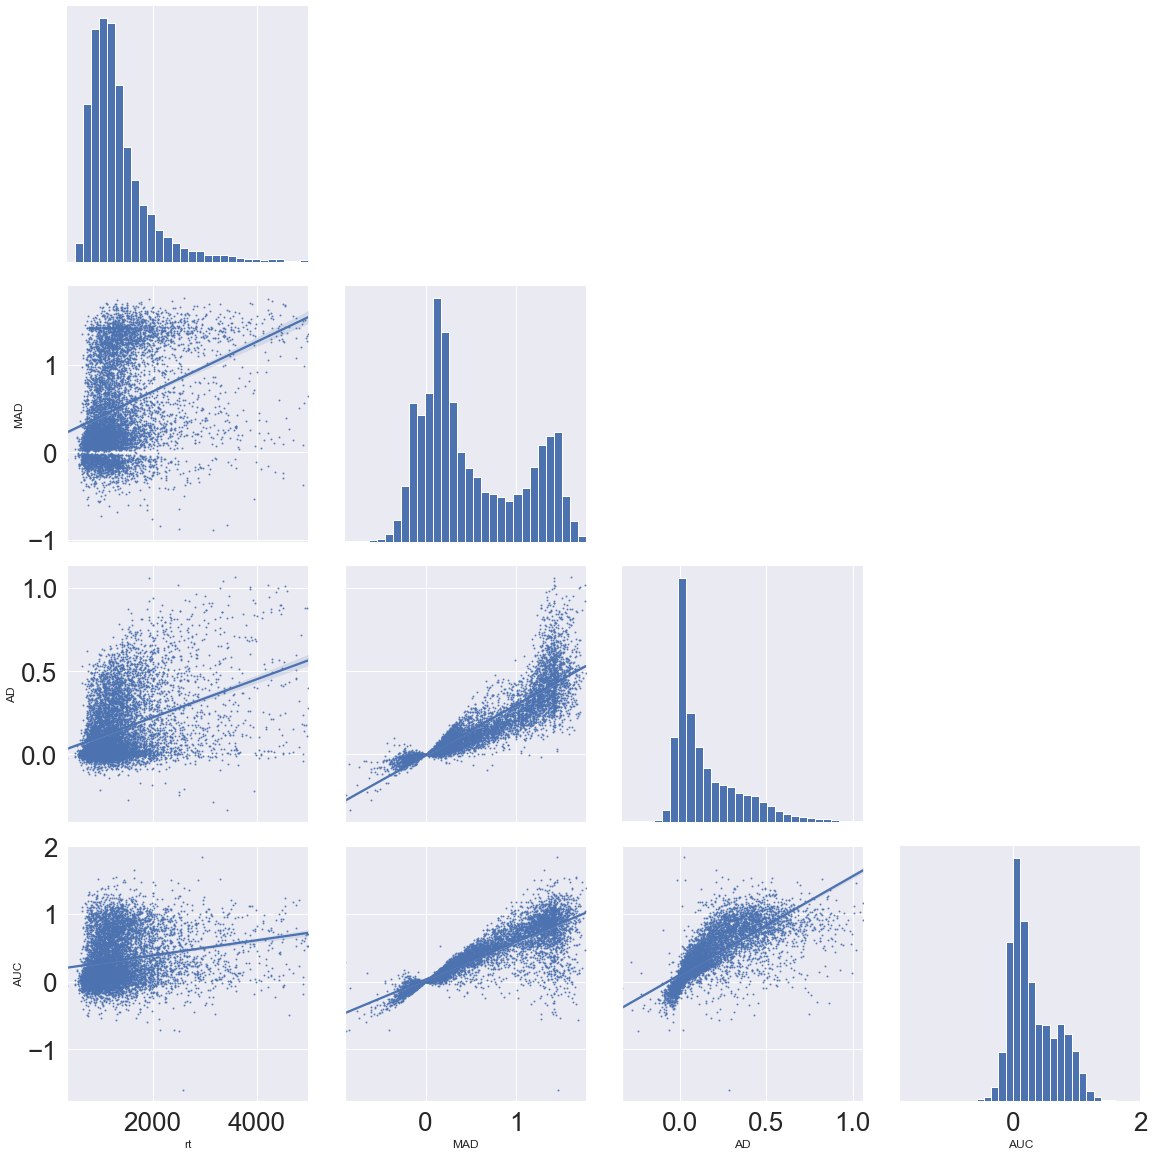

In [127]:
import seaborn as sns
sns.set()
sns.set_context(rc={"xtick.labelsize":26,'ytick.labelsize':26})
a1=sns.pairplot(dataeda1,height = 4, kind = "reg",corner=True,plot_kws={'scatter_kws':{'s':1}},diag_kws = {'alpha':1, 'bins':30})

plt.savefig('EDA2.jpg')

In [128]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
fig = ff.create_annotated_heatmap(dataeda1.corr().values.tolist(),
                                   
                                  y=dataeda1.columns.tolist(),
                                  x=dataeda1.columns.tolist(), 
                                  colorscale='Viridis',
                                  showscale=True
                                 )
fig.show()

In [129]:
pingouin.rcorr(dataeda1,method='pearson',padjust='bonf',stars=True)

,rt,MAD,AD,AUC
rt,-,***,***,***
MAD,0.322,-,***,***
AD,0.377,0.886,-,***
AUC,0.194,0.862,0.773,-
